# Task 4.10

## 1 - Importing Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alext\Desktop\Career Foundry\Programming\Instacart Basket Analysis'

In [6]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

In [3]:
df_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged_49.pkl'))

In [5]:
df_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))


### 2 - Adressing PII Data

In [8]:
df_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df_all = df_all.drop(columns = ['First Name'])

In [10]:
df_all = df_all.drop(columns = ['Last Name'])

***Double-checking revisions

In [11]:
df_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
pd.options.display.max_columns=None

In [13]:
df_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3 - Creating a Regional Data Segmentation via Wikipedia article

### 3a - Defining regions

In [14]:
Notheast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [15]:
df_all.loc[df_all['State'].isin(Notheast), 'Region'] = 'Northeast'
df_all.loc[df_all['State'].isin(South), 'Region'] = 'South'
df_all.loc[df_all['State'].isin(West), 'Region'] = 'West'
df_all.loc[df_all['State'].isin(Midwest), 'Region'] = 'Midwest'

***Need to check the df shape 

In [16]:
df_all.shape

(32404859, 33)

In [17]:
df_all['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

***3b Find if spending habits vary by region via crosstabs

In [18]:
crosstab = pd.crosstab(df_all['Region'], df_all['spending_flag'], dropna=False)

In [19]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


***Importing df to better performance

In [20]:
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_1.pkl'))

In [21]:
df_all_1=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_1.pkl'))

## 4 - Creating an exlusion flag for low-activity customers (5 orders or less)

In [22]:
pd.options.display.max_columns=None

In [23]:
df_all_1.shape

(32404859, 33)

In [24]:
df_all_1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [25]:
df_all_1.loc[df_all_1['max_order'] <= 5, 'activity_loc'] = 'low activity customer'

In [26]:
df_all_1.loc[df_all_1['max_order'] >5, 'activity_loc'] = 'high activity customer'

***Checking results then creating df with only the "low activity customers"

In [27]:
df_all_1['activity_loc'].value_counts(dropna=False)

high activity customer    30171424
low activity customer      2233435
Name: activity_loc, dtype: int64

In [28]:
df_low_activity=df_all_1[df_all_1['activity_loc'] == 'low activity customer']

In [29]:
df_low_activity.shape

(2233435, 34)

In [30]:
df_low_activity['max_order'].max()

5

In [31]:
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low Activity Customers.pkl'))

In [32]:
df_all_high = df_all_1[df_all_1['activity_loc'] == 'high activity customer']

In [34]:
df_all_high['max_order'].min()

6

In [33]:
df_all_high.shape

(30171424, 34)

### Exporting the df

In [35]:
df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high.pkl'))

## 5 - Creating a profile variable based on age, income, certain goods in the "department_id" column, and number of dependents.

Importing df

In [4]:
df_all_high=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high.pkl'))

In [5]:
pd.options.display.max_columns=None

In [6]:
df_all_high.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer


## Variables:

### Age

In [7]:
df_all_high['Age'].describe()

count    3.017142e+07
mean     4.947082e+01
std      1.848772e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [10]:
df_all_high.loc[df_all_high['Age'] >=65, 'age_group_loc'] = 'Older Age'

In [11]:
df_all_high.loc[df_all_high['Age'] <= 33, 'age_group_loc'] = 'Younger Age'

In [12]:
df_all_high.loc[(df_all_high['Age'] >= 34) & (df_all_high['Age'] <= 64), 'age_group_loc'] = 'Middle Age'

In [14]:
df_all_high.shape

(30171424, 35)

In [15]:
df_all_high['age_group_loc'].value_counts(dropna=False)

Middle Age     14623473
Older Age       7989725
Younger Age     7558226
Name: age_group_loc, dtype: int64

### Income

In [16]:
df_all_high['income'].describe()

count    3.017142e+07
mean     9.977020e+04
std      4.318342e+04
min      2.590300e+04
25%      6.742400e+04
50%      9.682300e+04
75%      1.281500e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
df_all_high.loc[df_all_high['income'] >142953, 'income_group_loc'] = 'High income'

In [18]:
df_all_high.loc[df_all_high['income'] <= 56587, 'income_group_loc'] = 'Low income'

In [19]:
df_all_high.loc[(df_all_high['income'] >56587) & (df_all_high['income'] <= 142953), 'income_group_loc'] = 'Medium income'

In [20]:
df_all_high['income_group_loc'].value_counts(dropna=False)

Medium income    20415048
High income       5029511
Low income        4726865
Name: income_group_loc, dtype: int64

In [21]:
df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high1.pkl'))

### "Department_id"

Importing df

In [22]:
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [23]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Re-naming column

In [24]:
df_depts=df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [25]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [26]:
df_all_high2=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high1.pkl'))

In [27]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [28]:
#Merge/ export df
df_depts.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dept_names.csv'))

### Dependants

In [31]:
df_all_high2['n_dependants'].value_counts(dropna=False)

3    7576814
0    7539213
2    7531754
1    7523643
Name: n_dependants, dtype: int64

In [30]:
df_all_high2.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income


In [33]:
df_all_high2.loc[df_all_high2['n_dependants'] == 0, 'dep_group_loc'] = 'No dependants'

In [34]:
df_all_high2.loc[df_all_high2['n_dependants'] > 0, 'dep_group_loc'] = 'Yes dependants'

In [35]:
df_all_high2.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants


## 6 - Creating visualizations to show the distribution of profiles

Age Group

<Axes: >

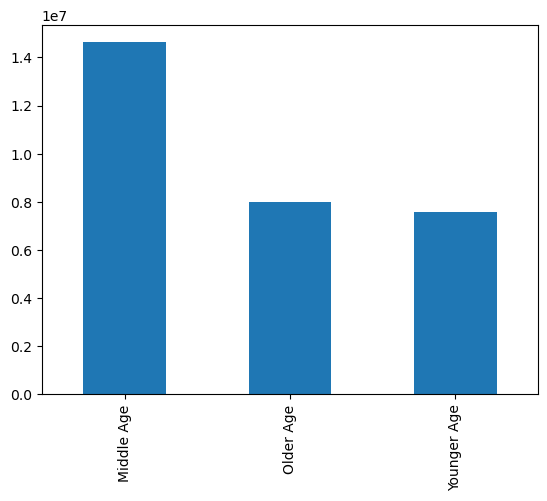

In [36]:
df_all_high2['age_group_loc'].value_counts().plot.bar()

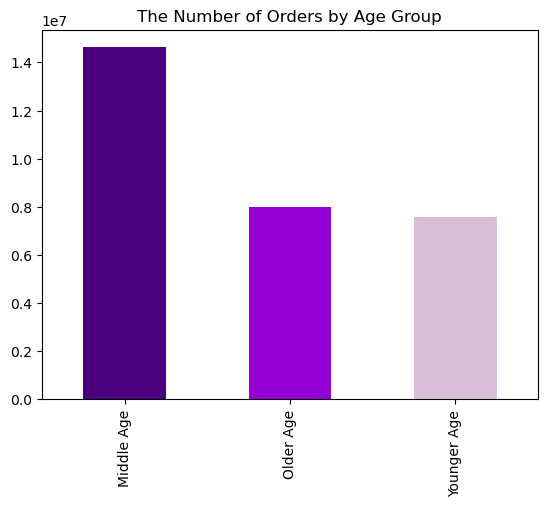

In [46]:
age_groups_bar = df_all_high2['age_group_loc'].value_counts().plot.bar(color = ['indigo', 'darkviolet', 'thistle'], title = 'The Number of Orders by Age Group')

In [47]:
#Export graph
age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups_bar.png'))

Income Group

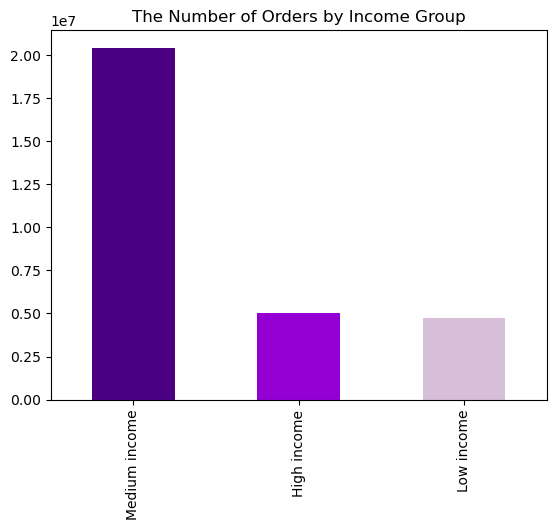

In [48]:
income_group_bar = df_all_high2['income_group_loc'].value_counts().plot.bar(color = ['indigo', 'darkviolet', 'thistle'], title = 'The Number of Orders by Income Group')

In [49]:
#Export graph
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_bar.png'))

Dependents Group

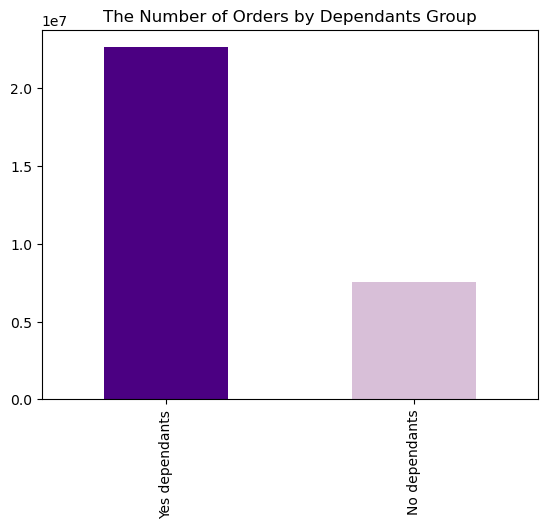

In [53]:
dependant_group_bar = df_all_high2['dep_group_loc'].value_counts().plot.bar(color = ['indigo', 'thistle'], title = 'The Number of Orders by Dependants Group')

In [55]:
#Export graph
dependant_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_group_bar.png'))

In [54]:
#Export df
df_all_high2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high2.pkl'))

## 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Creating customer level profiles

In [6]:
#Importing the dataframe
df_all_high3=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high2.pkl'))

In [7]:
#Making sure there are no PII hidden
df_all_high3=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high2.pkl'))

In [9]:
df_all_high3.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
6,550135,1,prior,7,1,9,20.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants


In [10]:
#Elderly customer profile
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Older Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Older Parent'

In [11]:
#Young parent customer profile
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Younger Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Young_Parent'

In [12]:
#Middle-aged parent customer profile
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Middle Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Middle_age_Parent'

In [13]:
#Single customers sorted by age group 
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Younger Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Younger Single'

In [14]:
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Middle Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Middle Aged Single'

In [15]:
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Older Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Older Single'

Aggregating "prices"

In [16]:
df_all_high3.groupby('age_group_loc').agg({'prices':['min', 'mean', 'max']})

prices                    
                 min       mean      max
age_group_loc                           
Middle Age       1.0  11.919029  99999.0
Older Age        1.0  11.683091  99999.0
Younger Age      1.0  11.924845  99999.0

Aggregating customer profile

In [17]:
df_all_high3.groupby('cust_profile').agg({'prices':['min', 'mean', 'max']})

prices                    
                      min       mean      max
cust_profile                                 
Middle Aged Single    1.0  12.393191  99999.0
Middle_age_Parent     1.0  11.890835  99999.0
Older Parent          1.0  11.553461  99999.0
Young_Parent          1.0  11.820146  99999.0
Younger Single        1.0  12.239148  99999.0

In [68]:
#Exporting df
df_all_high3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high3.pkl'))

In [69]:
#Importing df
df_all_high3=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_all_high3.pkl'))

NAN's in customer profile

In [71]:
df_all_high3.groupby('fam_status').agg({'n_dependants' : ['min', 'mean', 'max']})

n_dependants              
                                          min      mean max
fam_status                                                 
divorced/widowed                            0  0.000000   0
living with parents and siblings            1  1.986320   3
married                                     1  2.003442   3
single                                      0  0.000000   0

In [72]:
#Making sure no PII hidden
pd.options.display.max_columns=None

In [73]:
df_all_high3.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc,cust_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent


Customer profile

In [76]:
df_all_high3.groupby('cust_profile').agg({'days_since_last_order':['min', 'mean', 'max']})

days_since_last_order                 
                                     min       mean   max
cust_profile                                             
Middle Aged Single                   0.0  10.576035  30.0
Middle_age_Parent                    0.0  10.645999  30.0
Older Parent                         0.0  10.626185  30.0
Young_Parent                         0.0  10.648689  30.0
Younger Single                       0.0  10.714953  30.0

## 8 - Customer profiles departments/ regions

Grouping customer profiles and regions

In [18]:
profile_region = df_all_high3.groupby(['Region', 'cust_profile']).size().unstack(fill_value=0)

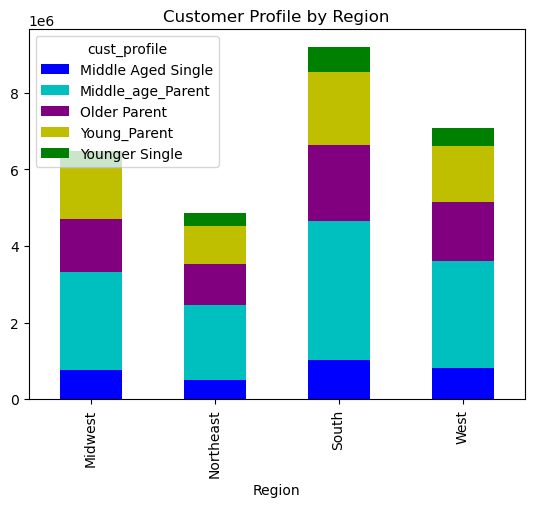

In [19]:
profile_region_bar_2 = profile_region.plot.bar(color = ['blue','c','purple','y','green'], stacked = True, title = 'Customer Profile by Region')

In [20]:
#Exporting graph
profile_region_bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region_bar_2.png'))

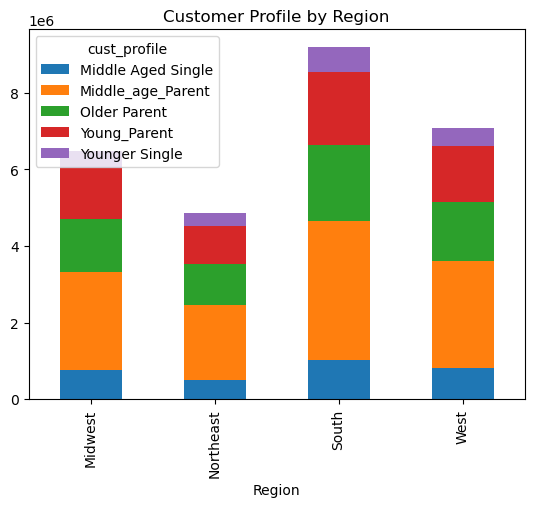

In [79]:
profile_region_bar = profile_region.plot.bar(stacked = True, title = 'Customer Profile by Region')

In [80]:
#Exporting graph
profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region_bar.png'))

In [81]:
df_all_high3.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc,cust_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Min-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent


Assigning department names

In [82]:
df_all_high3.loc[df_all_high3['department_id'] == 1, 'department'] = 'frozen'
df_all_high3.loc[df_all_high3['department_id'] == 2, 'department'] = 'other'
df_all_high3.loc[df_all_high3['department_id'] == 3, 'department'] = 'bakery'
df_all_high3.loc[df_all_high3['department_id'] == 4, 'department'] = 'produce'
df_all_high3.loc[df_all_high3['department_id'] == 5, 'department'] = 'alcohol'
df_all_high3.loc[df_all_high3['department_id'] == 6, 'department'] = 'international'
df_all_high3.loc[df_all_high3['department_id'] == 7, 'department'] = 'beverages'
df_all_high3.loc[df_all_high3['department_id'] == 8, 'department'] = 'pets'
df_all_high3.loc[df_all_high3['department_id'] == 9, 'department'] = 'dry goods-pasta'
df_all_high3.loc[df_all_high3['department_id'] == 10, 'department'] = 'bulk'
df_all_high3.loc[df_all_high3['department_id'] == 11, 'department'] = 'personal care'
df_all_high3.loc[df_all_high3['department_id'] == 12, 'department'] = 'meat-seafood'
df_all_high3.loc[df_all_high3['department_id'] == 13, 'department'] = 'pantry'
df_all_high3.loc[df_all_high3['department_id'] == 14, 'department'] = 'breakfast'
df_all_high3.loc[df_all_high3['department_id'] == 15, 'department'] = 'canned goods'
df_all_high3.loc[df_all_high3['department_id'] == 16, 'department'] = 'dairy-eggs'
df_all_high3.loc[df_all_high3['department_id'] == 17, 'department'] = 'household'
df_all_high3.loc[df_all_high3['department_id'] == 18, 'department'] = 'babies'
df_all_high3.loc[df_all_high3['department_id'] == 19, 'department'] = 'snacks'
df_all_high3.loc[df_all_high3['department_id'] == 20, 'department'] = 'deli'
df_all_high3.loc[df_all_high3['department_id'] == 21, 'department'] = 'missing'

In [83]:
#Grouping departments
profile_depts = df_all_high3.groupby(['department', 'cust_profile']).size().unstack(fill_value=0)

Stacked bar chart

In [ ]:
(color = ['indigo', 'thistle']

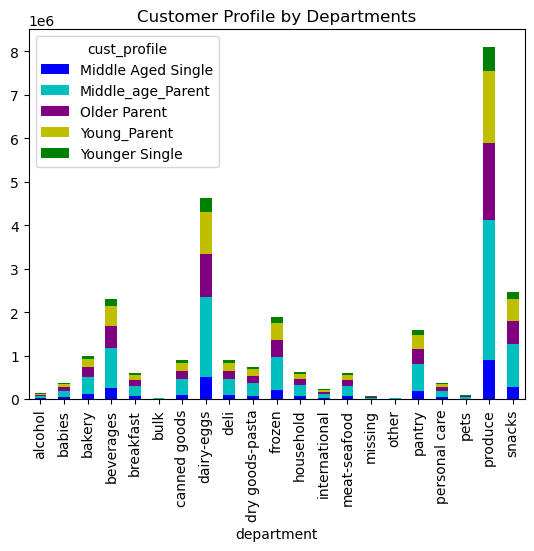

In [127]:
profile_depts_bar = profile_depts.plot.bar(color = ['blue','c','purple','y','green'], stacked = True, title = 'Customer Profile by Departments')

In [128]:
#Export graph
profile_depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_depts_bar.png'))

In [86]:
#Grouping departments 
region_depts = df_all_high3.groupby(['department', 'Region']).size().unstack(fill_value=0)

Stacked bar chart #2

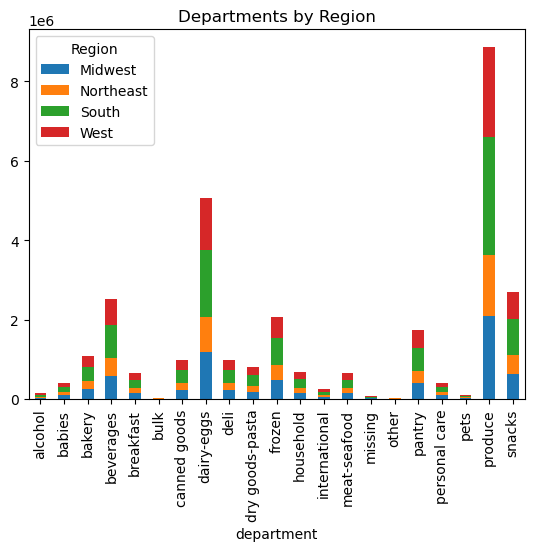

In [87]:
region_depts_bar = region_depts.plot.bar(stacked = True, title = 'Departments by Region')

In [130]:
df_all_high3.shape

(30171424, 39)

In [129]:
#Export graph
region_depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_depts_bar.png'))

In [131]:
#Export df
df_all_high3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all_FINAL.pkl'))

In [132]:
#Import df
df_all_high3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Orders_products_all_FINAL.pkl'))

Creating bar graph for departments 

In [21]:
dept_frequency_bar_2 = df_all_high3['department'].value_counts().plot.bar(color = 'indigo', title = 'Department Consumption')

KeyError: 'department'

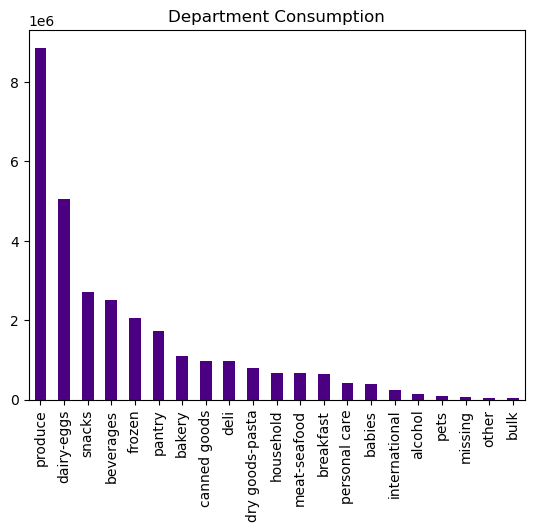

In [136]:
dept_frequency_bar = df_all_high3['department'].value_counts().plot.bar(color = 'indigo', title = 'Department Consumption')

In [139]:
#Export graph
dept_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_frequency_bar.png'))